In [1]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from pylab import mpl
%matplotlib inline

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)

# 从硬盘读取数据进入内存
df = pd.read_excel("附件一：325个样本数据.xlsx")

In [2]:
#方差过滤

count = 0
column = []

for j in range(df.shape[1] - 1):
    if df.iloc[:,j + 1].std() < 0.1:
        column.append(j + 1)

#for i in column:
df.drop(labels = df.columns[column], axis= 1, inplace = True)

In [3]:
df

辛烷值RON    硫含量,μg/g  辛烷值RON.1  饱和烃,v%（烷烃+环烷烃）      烯烃,v%      芳烃,v%  \
0     89.22  188.000000      90.6       53.230000  24.400000  22.370000   
1     89.32  169.000000      90.5       52.300000  26.400000  21.300000   
2     89.32  177.000000      90.7       52.300000  26.314286  21.385714   
3     89.02  159.000000      90.4       52.300000  26.100000  21.600000   
4     88.32  173.000000      89.6       52.242857  26.671429  21.085714   
5     89.59  163.000000      91.0       52.100000  28.100000  19.800000   
6     89.20  209.000000      90.4       51.357143  28.414286  20.228571   
7     89.20  195.000000      90.5       49.500000  29.200000  21.300000   
8     89.30  165.000000      90.4       49.857143  29.071429  21.071429   
9     88.80  159.000000      90.2       50.214286  28.942857  20.842857   
10    88.90   85.000000      90.2       52.000000  28.300000  19.700000   
11    88.90  117.000000      90.2       53.000000  28.122222  18.877778   
12    87.70  103.000000      89.2       55.500000  27.677778  16.822222   
13    85.40   83.000000      86.8       56.500000  27.500000  16.000000   
14    86.10  121.000000      87.8       55.700000  27.200000  17.100000   
15    86.70  115.000000      88.4       56.557143  26.285714  17.157143   
16    86.10   77.000000      87.2       57.200000  25.600000  17.200000   
17    86.49  108.000000      88.0       56.342857  23.828571  19.828571   
18    87.09   98.170000      88.2       55.914286  22.942857  21.142857   
19    87.59  117.000000      88.8       55.700000  22.500000  21.800000   
20    86.59  111.000000      88.1       56.414286  23.142857  20.442857   
21    87.19   57.000000      88.2       56.700000  23.400000  19.900000   
22    87.99  148.000000      89.6       56.585714  21.514286  21.900000   
23    87.59  131.000000      89.0       56.500000  20.100000  23.400000   
24    87.89  222.000000      89.3       55.128571  22.557143  22.314286   
25    87.69  125.000000      89.2       54.100000  24.400000  21.500000   
26    87.29  156.000000      88.7       55.185714  21.085714  23.728571   
27    87.89  170.000000      89.0       56.000000  18.600000  25.400000   
28    88.29  206.000000      89.7       55.809524  19.514286  24.676190   
29    87.99  185.000000      89.2       55.666667  20.200000  24.133333   
30    87.39  172.000000      89.1       55.476190  21.114286  23.409524   
31    87.09  133.000000      88.5       55.333333  21.800000  22.866667   
32    87.29  189.000000      88.4       55.142857  22.714286  22.142857   
33    87.19  144.000000      88.1       55.000000  23.400000  21.600000   
34    87.59  210.000000      88.7       54.514286  24.028571  21.457143   
35    86.09  137.000000      87.5       54.150000  24.500000  21.350000   
36    88.09  168.000000      89.4       53.664286  25.128571  21.207143   
37    87.79  154.000000      89.1       53.300000  25.600000  21.100000   
38    88.26  230.000000      89.5       53.600000  26.000000  20.400000   
39    88.26  236.000000      89.7       51.314286  27.142857  21.542857   
40    87.66  236.000000      89.2       49.600000  28.000000  22.400000   
41    88.58  204.000000      89.8       50.342857  29.142857  20.514286   
42    88.06  172.000000      89.6       50.900000  30.000000  19.100000   
43    88.10  179.000000      89.5       52.328571  29.085714  18.585714   
44    88.50  275.000000      89.7       53.400000  28.400000  18.200000   
45    88.30  216.000000      89.5       53.342857  27.885714  18.771429   
46    88.30  286.000000      89.6       53.300000  27.500000  19.200000   
47    88.80  209.000000      90.0       54.157143  25.957143  19.885714   
48    89.10  264.000000      90.2       54.800000  24.800000  20.400000   
49    88.60  132.000000      89.6       57.442857  22.285714  20.271429   
50    88.42  221.000000      89.6       59.500000  20.400000  20.100000   
51    88.70  126.000000      90.1       58.528571  20.171429  21.300000   
52    89.00  199.000000      9

In [4]:
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

#将数据划分为标签和特征
X = df.drop(['辛烷值RON'],axis = 1).values
y = df['辛烷值RON'].values

In [5]:
# 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

In [6]:
from sklearn.ensemble import RandomForestRegressor #回归

feature_name = df.drop(['辛烷值RON'],axis = 1).columns
rfc = RandomForestRegressor(
    n_estimators=100,
    random_state=1,
    n_jobs=-1) # 随机森林实例化
# 训练
rfc = rfc.fit(Xtrain,Ytrain)
# 得分
score_Random_Forest = rfc.score(Xtest,Ytest)
print(score_Random_Forest)

r = [*zip(feature_name,rfc.feature_importances_)]
r.sort(key=lambda x:x[1],reverse = True)
r

0.9433439957196859


[('辛烷值RON.1', 0.9318623816279504),
 ('精制汽油出装置硫含量', 0.0023141702765566057),
 ('硫含量,μg/g', 0.001591988922900025),
 ('R-102 #3通风挡板温度', 0.0014632116458421455),
 ('进装置原料硫含量', 0.0013108881249533568),
 ('EH-102出口管', 0.0011577030287323001),
 ('R-102底滑阀差压', 0.0011385181407496021),
 ('D-110蒸汽盘管入口流量', 0.0009700063019975367),
 ('混氢点氢气流量', 0.0009358679769007397),
 ('还原器温度', 0.0008838620201013608),
 ('加热炉效率', 0.0007841568877508887),
 ('D-102温度', 0.0007530060563596847),
 ('再生器温度', 0.0007267405077888286),
 ('2#催化汽油进装置流量', 0.0007258652497492759),
 ('R-102底滑阀', 0.0007004351282622882),
 ('D104温度', 0.0006967931722913371),
 ('S_ZORB AT-0002', 0.0006857947504496417),
 ('加热炉排烟温度', 0.0006786114741200412),
 ('再生器下部温度.1', 0.0006555032729504821),
 ('S_ZORB AT-0003', 0.0006236020162661218),
 ('再生器顶部/再生器接收器差压', 0.0006094489383903799),
 ('A-202A/B出口总管温度', 0.0006027842069757061),
 ('E203重沸器管程出口凝结水流量', 0.0005899498556561603),
 ('P-101A入口过滤器差压', 0.0005865086328127917),
 ('D-110底流化N2流量', 0.0005833113501973012),
 ('S_ZO

In [7]:
#将数据划分为标签和特征
df['辛烷值RON'] = df['辛烷值RON'].astype('int64')
X = df.drop(['辛烷值RON'],axis = 1).values
y = df['辛烷值RON'].values

# 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import RandomForestClassifier #分类

feature_name = df.drop(['辛烷值RON'],axis = 1).columns
rfc = RandomForestClassifier(n_estimators=60, random_state=0) # 随机森林实例化
# 训练
rfc = rfc.fit(Xtrain,Ytrain)
# 得分
score_Random_Forest = rfc.score(Xtest,Ytest)
print(score_Random_Forest)

r = [*zip(feature_name,rfc.feature_importances_)]
r.sort(key=lambda x:x[1],reverse = True)
r

0.7244897959183674


[('辛烷值RON.1', 0.07706287742494695),
 ('D104温度', 0.016137269932639878),
 ('轻烃出装置流量', 0.016007783863586356),
 ('D-105下锥体松动风流量', 0.01507816460883659),
 ('净化风进装置流量', 0.01402250229404749),
 ('C-201下部进料管温度', 0.0120655231194594),
 ('原料汽油硫含量', 0.011354810034336641),
 ('E-101壳程出口总管温度', 0.010930504243676377),
 ('K-101B排气压力', 0.010662915514985216),
 ('硫含量,μg/g', 0.010359205888274105),
 ('还原器温度', 0.009911829695003422),
 ('R-102 #3通风挡板温度', 0.009701686357118853),
 ('R-102底滑阀差压', 0.009610812286772654),
 ('EH-102出口管', 0.00924138919524789),
 ('E-205壳程出口管温度', 0.008976746462954287),
 ('F-101循环氢出口管温度', 0.008398856504410196),
 ('R102再生器提升氮气流量', 0.008349766531888098),
 ('8.0MPa氢气至循环氢压缩机入口.1', 0.008133005165399677),
 ('E-101A壳程出口管温度', 0.007931629593680918),
 ('闭锁料斗氧含量', 0.007313430127676028),
 ('紧急氢气去R-101流量', 0.006971096436646874),
 ('精制汽油出装置硫含量', 0.006813640197946867),
 ('R-101下部床层压降', 0.0067307071575476215),
 ('原料进装置温度', 0.006453698921670489),
 ('密度(20℃),\nkg/m³', 0.006426315443600656),
 ('再生器底部与再生接收器压差',

In [8]:
count = []

for i in range(30):
    count.append(r[i][0])

count

['辛烷值RON.1',
 'D104温度',
 '轻烃出装置流量',
 'D-105下锥体松动风流量',
 '净化风进装置流量',
 'C-201下部进料管温度',
 '原料汽油硫含量',
 'E-101壳程出口总管温度',
 'K-101B排气压力',
 '硫含量,μg/g',
 '还原器温度',
 'R-102 #3通风挡板温度',
 'R-102底滑阀差压',
 'EH-102出口管',
 'E-205壳程出口管温度',
 'F-101循环氢出口管温度',
 'R102再生器提升氮气流量',
 '8.0MPa氢气至循环氢压缩机入口.1',
 'E-101A壳程出口管温度',
 '闭锁料斗氧含量',
 '紧急氢气去R-101流量',
 '精制汽油出装置硫含量',
 'R-101下部床层压降',
 '原料进装置温度',
 '密度(20℃),\nkg/m³',
 '再生器底部与再生接收器压差',
 '稳定塔顶回流流量',
 'TAG表和PID图未见PDI-2107点，是否为DI-2107',
 '0.1',
 'D121去稳定塔流量']

D:\DevelopmentTool\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\DevelopmentTool\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 179 missing from current font.
  font.set_text(s, 0, flags=flags)


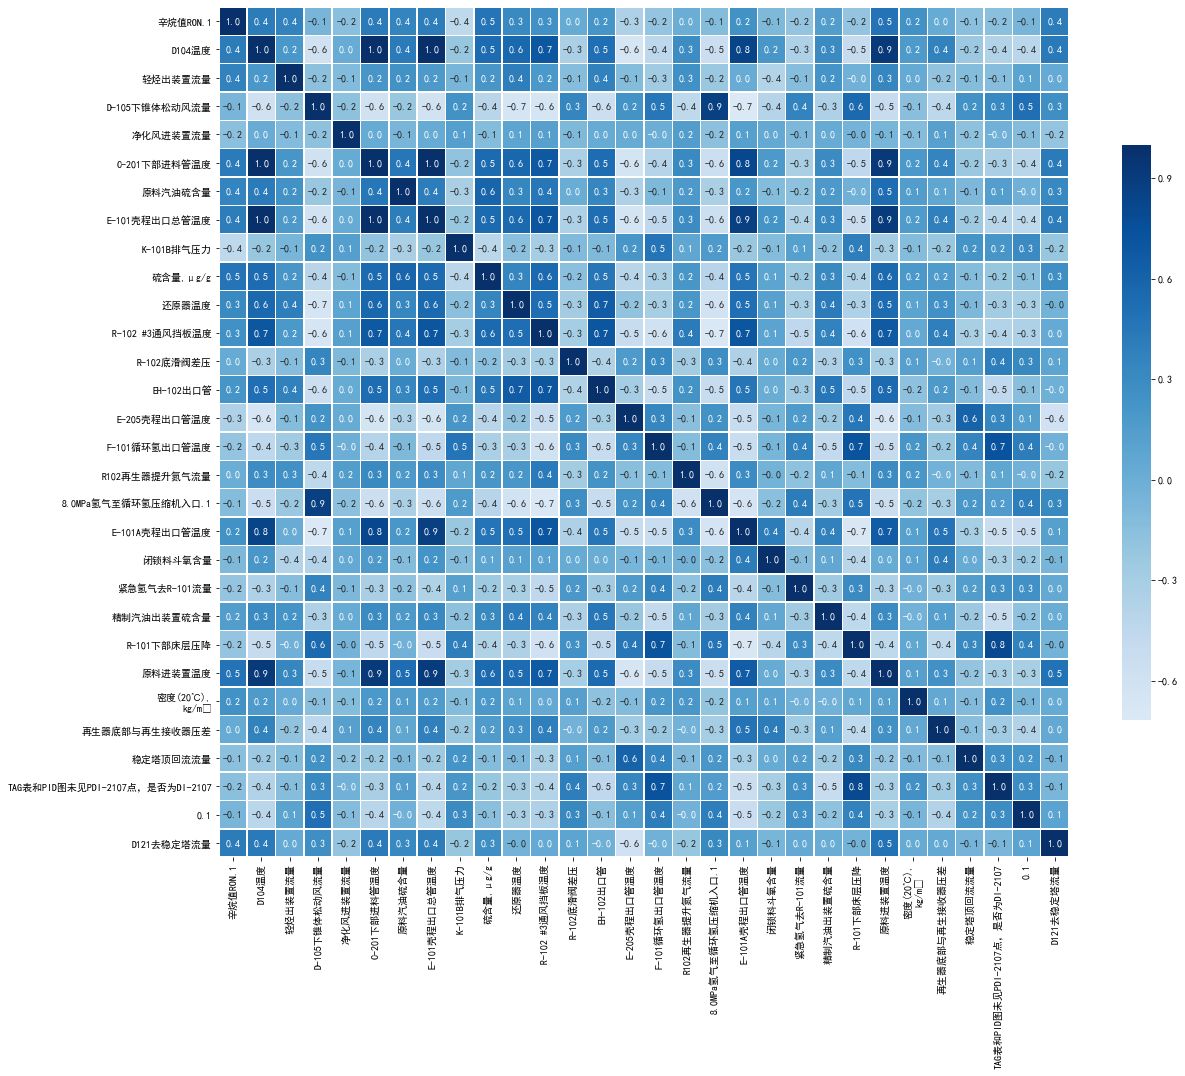

In [9]:
import seaborn as sns

plt.figure(figsize=(18,18))
sns.heatmap(df[count].corr(), center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='.1f',cmap='Blues',
            )#只显示一半mask=np.triu(np.ones_like(df[count].corr(),dtype=np.bool))
plt.savefig("01.png")
plt.tight_layout()

In [10]:
df2 = df[count]
df2
#df2.to_excel("1.xlsx")

辛烷值RON.1      D104温度      轻烃出装置流量  D-105下锥体松动风流量    净化风进装置流量  \
0        90.6  125.191775  1813.561800      22.621982   97.244000   
1        90.5  125.757300  1860.659000      22.486249  100.028165   
2        90.7  124.889755  1915.386250      22.635298   98.516146   
3        90.4  127.682460  1896.603650      23.093171   99.277666   
4        89.6  127.741840  1915.158450      23.282552   98.592974   
5        91.0  129.692145  1295.764200      23.679510  102.319521   
6        90.4  127.672970  1327.636050      23.697595  102.345095   
7        90.5  130.897155  1126.233850      24.226647   99.603969   
8        90.4  128.292245  1265.680750      24.384396  100.837296   
9        90.2  129.350085  1019.199250      24.493086  102.123863   
10       90.2  115.747800  1243.377800      24.592386  104.064185   
11       90.2  116.368430  1178.519650      24.579176  100.604301   
12       89.2  115.529460     0.000000      24.861186   98.870778   
13       86.8  115.943310     0.000000      24.935935   98.742703   
14       87.8  115.119355     0.000000      25.217181  107.659597   
15       88.4  116.946595     0.000000      25.172827  103.531421   
16       87.2  115.864125     0.000000      25.097973  104.372900   
17       88.0  114.435885     0.000000      25.088118  103.288697   
18       88.2  117.018530     0.000000      25.227367  103.530525   
19       88.8  117.995670     0.000000      25.232850  100.298190   
20       88.1  116.225020     0.000000      25.609790  102.052172   
21       88.2  117.186215     0.000000      25.731601  103.144432   
22       89.6  128.170165     0.000000      25.730033  101.176444   
23       89.0  123.584465     0.000000      25.815984  101.999444   
24       89.3  125.931285     0.000000      25.823710  101.695763   
25       89.2  126.246190     0.000000      25.758917  100.972112   
26       88.7  126.046045     0.000000      25.733017  107.663438   
27       89.0  128.645340     0.000000      25.752636  117.476625   
28       89.7  127.813545     0.000000      25.980732  108.224044   
29       89.2  128.181980     0.000000      25.829227  109.253234   
30       89.1  129.073755     0.000000      25.866735  112.488480   
31       88.5  127.167855     0.000000      25.808636  109.710750   
32       88.4  127.544485     0.000000      25.641440  111.722750   
33       88.1  128.664005     0.000000      25.397164  113.289330   
34       88.7  128.794260     0.000000      25.128477  112.184870   
35       87.5  128.313570     0.000000      24.932472  115.732005   
36       89.4  130.427755     0.000000      24.701053  113.521315   
37       89.1  130.222200     0.000000      24.669499  117.450261   
38       89.5  129.691875     0.000000      24.078412  114.837601   
39       89.7  130.002365     0.000000      23.812766  118.349410   
40       89.2  129.170300     0.000000      23.817487  114.829660   
41       89.8  128.283355     0.000000      23.957483  118.039680   
42       89.6  126.182685     0.000000      23.777037  116.137672   
43       89.5  126.771385   983.751805      23.249480  120.636020   
44       89.7  128.345835   977.503660      23.073782  109.538188   
45       89.5  126.689665   972.052560      22.615008  111.391979   
46       89.6  128.846815   972.350760      22.754807  116.562335   
47       90.0  127.958340  1003.205860      22.414232  110.986208   
48       90.2  126.981245  1020.748050      21.942161  112.760575   
49       89.6  127.383890  1036.731200      21.467892  118.320865   
50       89.6  126.362795  1046.409650      21.143338  117.717655   
51       90.1  127.982685  1057.469100      20.782566  115.329975   
52       90.2  127.253590  1068.748850      20.652163  119.206275   
53       90.1  131.837440  1057.979250      20.628825  109.926638   
54       89.8  128.075565  1090.935350      20.384277  115.337245   
55       89.6  132.570370  1051.393100      20.226078  108.186415   
56       89.4  130.412325  1071.691700      20.126831  106.847974   
57 